# FOOOFing OMEGA Data

This notebook explores running FOOOF on MEG-PSD data.

In [1]:
%matplotlib inline

import os

import numpy as np
import matplotlib.pyplot as plt

from fooof import FOOOF, FOOOFGroup

from om.core.db import OMDB
from om.core.io import load_meg_psds

In [2]:
# Get database and path details from OMDB class
db = OMDB()

In [3]:
# Check available subject numbers for PSD files
sub_nums = db.check_dat_files('PSD', 'HCP')

In [4]:
# Check which PSD files haven't been FOOFed
psd_files, _ = db.check_dat_files('PSD', 'HCP', verbose=False)
fooof_files, _ = db.check_dat_files('fooof', 'HCP', verbose=True)

not_fooofed = []
for file in psd_files:
    if file not in fooof_files:
        not_fooofed.append(file)

print(str(len(not_fooofed)), 'Subject Files not yet FOOOFed: ')
print(not_fooofed)


Number of Subjects available: 81

Subject numbers with FOOOF data available: 
[162026, 153732, 172029, 175540, 825048, 187547, 102816, 512835, 174841, 109123, 164636, 660951, 352132, 250427, 100307, 166438, 221319, 917255, 111514, 158136, 214524, 706040, 283543, 106521, 156334, 559053, 198653, 181232, 212318, 205119, 725751, 581450, 255639, 248339, 195041, 293748, 665254, 191841, 116726, 667056, 352738, 891667, 212823, 140117, 353740, 287248, 898176, 715950, 105923, 185442, 990366, 877168, 154532, 233326, 601127, 599671, 189349, 204521, 679770, 406836, 257845, 112920, 735148, 568963, 116524, 113922, 912447, 162935, 358144, 707749, 223929, 192641, 191437, 814649, 175237, 783462, 555348, 191033, 146129, 662551, 433839]

0 Subject Files not yet FOOOFed: 
[]


## CHECK PSD DATA

In [5]:
# Load MEG Data
#subj = 257845
#subj = 662551
subj = 102816

psd, freqs = load_meg_psds('HCP', db.psd_path, subj)

In [6]:
# Check data - get number of PSDs and frequency resolution
[nPSDs, nFreqs] = np.shape(psd)
freq_res = np.mean(np.diff(freqs))
f_min = freqs.min()
f_max = freqs.max()
print('Number of PSDs is: ', nPSDs)
print('Frequency Resolution is: ', freq_res)
print('Frequency range is: ', f_min, ' to ', f_max)

Number of PSDs is:  7501
Frequency Resolution is:  0.48828124999983696
Frequency range is:  0.0  to  499.99999999983305


In [7]:
# FOOOF SETTINGS
peak_width_limits = [1, 6]
max_n_peaks = 6
min_peak_height = 0.2

# Initialize FOOOF model
fm = FOOOF(peak_width_limits, max_n_peaks, min_peak_height)

In [8]:
freq_range = [3, 35]
cur_psd = psd[2350, :]

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 3 - 35 Hz                        
                                 Frequency Resolution is 0.49 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -21.5878, 0.7189                                         
                                                                                                  
                                       2 peaks were found:                                        
          

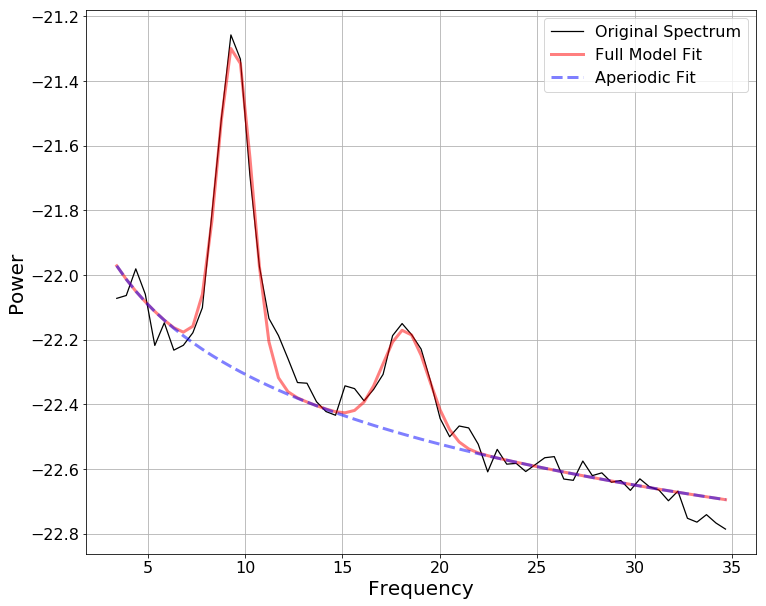

In [9]:
fm.report(freqs, cur_psd, freq_range, False)

## Check FOOOF Results

Load and check an MEG subjects FOOOF results that have already been run. 

In [10]:
# ToDo.